# Project 3: Web APIs & NLP
---
Book 1: Data Collection<br>
Book 2: Data Cleaning & Exploratory Data Analysis<br>
Book 3: Preprocessing & Vectorization<br>
Book 4: ML Modeling<br>
**Book 5: Sentiment Analysis, Conclusion & Recommendation**<br>
Author: Lee Wan Xian

## Contents:
- [Sentiment Analysis](#Sentiment-Analysis)
- [Conclusion](#Conclusion)
- [Recommendation](#Recommendation)

## Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import emoji
from transformers import pipeline

In [2]:
# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

## Sentiment Analysis

### Preprocessing

In [3]:
# Import corpus for sentiment analysis
df_senti = pd.read_csv('../data/df_senti.csv')

In [4]:
# Drop unwanted columns
df_senti = df_senti[['subreddit', 'title']]

In [5]:
print(df_senti.shape)
df_senti.info()

(29831, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29831 entries, 0 to 29830
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  29831 non-null  object
 1   title      29831 non-null  object
dtypes: object(2)
memory usage: 466.2+ KB


In [6]:
# Lowercase full_text & subreddit for BERT model
df_senti['subreddit'] = df_senti['subreddit'].str.lower()
df_senti['title'] = df_senti['title'].str.lower()

In [7]:
# Convert emojis into text
df_senti['title'] = df_senti['title'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

### Create subsets for individual shows

For this sentiment analysis, we will look into the emotional sentiments on posts for the below 6 shows, given that these words have a high presence in DisneyPlus and Netflix corpus.
* Squid Game
* Stranger Things
* Better Call Saul
* Black Widow
* Star Wars
* Moon Knight

In [8]:
# Create sub corpus for all 6 shows
df_squidgame = df_senti[df_senti['title'].str.contains('squid game')]
df_stranger = df_senti[df_senti['title'].str.contains('stranger things')]
df_callsaul = df_senti[df_senti['title'].str.contains('better call saul')]
df_blackwidow = df_senti[df_senti['title'].str.contains('black widow')]
df_starwars = df_senti[df_senti['title'].str.contains('star wars')]
df_moonknight = df_senti[df_senti['title'].str.contains('moonknight')]

### Sentiment Analysis Modelling

We will be using the `emotion-english-distilroberta-base` sentiment model from BERT to pull out the key emotion for each title ([model](https://huggingface.co/j-hartmann/emotion-english-distilroberta-base)).

In [9]:
# Instantiate Sentiment model
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=1)

In [10]:
# Function to assign main emotion to title

def main_senti(text):
    
    s = classifier(text)         # Capture the top emotion derived from BERT model
    df = pd.DataFrame(data=s)    # Convert the result as a Pandas dataframe
    sen = df.iat[0,0]            # Pull out the dictionary located in cell [0,0] of the dataframe
    
    return sen.get('label')      # Pull out the value of key:label from the dictionary

In [11]:
# Input the main emotion for each document
df_squidgame['emotion'] = df_squidgame['title'].apply(main_senti)
df_stranger['emotion'] = df_stranger['title'].apply(main_senti)
df_callsaul['emotion'] = df_callsaul['title'].apply(main_senti)
df_blackwidow['emotion'] = df_blackwidow['title'].apply(main_senti)
df_starwars['emotion'] = df_starwars['title'].apply(main_senti)
df_moonknight['emotion'] = df_moonknight['title'].apply(main_senti)

C:\Anaconda\envs\dsi-proj3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\dsi-proj3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\envs\dsi-proj3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

*Note: The SettingWithCopyWarning warning message is a false alarm. As there is no value assignment done, this warning has no relevance for this case and can be ignored*

In [12]:
# Create series of count of emotion against shows
squid_game = df_squidgame.groupby('emotion')['emotion'].count()
stranger_things = df_stranger.groupby('emotion')['emotion'].count()
better_call_saul = df_callsaul.groupby('emotion')['emotion'].count()
black_widow = df_blackwidow.groupby('emotion')['emotion'].count()
star_wars = df_starwars.groupby('emotion')['emotion'].count()
moon_knight = df_moonknight.groupby('emotion')['emotion'].count()

In [13]:
# Create a df for emotions against shows
df_emotion = pd.DataFrame({
    'Squid Game': squid_game,
    'Stranger Things': stranger_things,
    'Better Call Saul': better_call_saul,
    'Black Widow': black_widow,
    'Star Wars': star_wars,
    'Moon Knight': moon_knight
})

# Fill NaN cells with '0'
df_emotion.fillna(0, inplace=True)

In [14]:
# Display the dataframe for emotions
df_emotion

,Squid Game,Stranger Things,Better Call Saul,Black Widow,Star Wars,Moon Knight
emotion,,,,,,
anger,7,16,2.0,3.0,3,0.0
disgust,2,9,0.0,0.0,3,0.0
fear,3,17,5.0,1.0,12,0.0
joy,21,56,4.0,12.0,46,3.0
neutral,59,219,54.0,57.0,150,5.0
sadness,3,17,12.0,19.0,28,1.0
surprise,10,103,9.0,16.0,42,2.0


In [15]:
# Create a total sum of emotions column in df_emotion
df_emotion['Total'] = df_emotion.sum(axis=1)

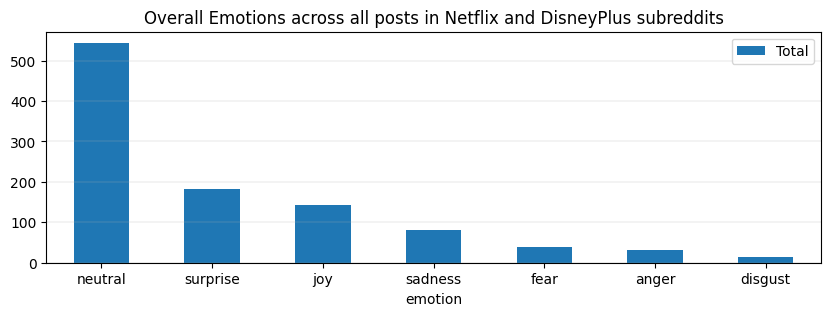

In [16]:
# Bar chart for emotion sentiments for all shows
df_emotion.sort_values('Total', ascending=False).plot(y='Total', kind='bar', rot=0, figsize=(10,3));
plt.grid(axis='y', linewidth = 0.2)
plt.title('Overall Emotions across all posts in Netflix and DisneyPlus subreddits');

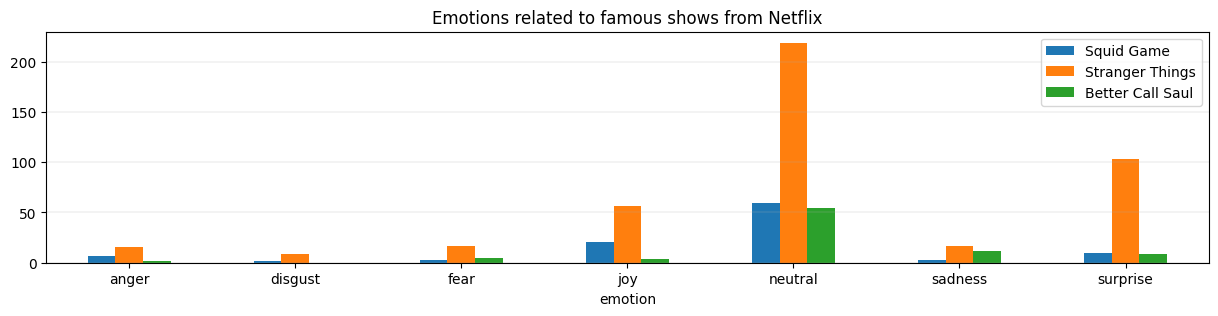

In [17]:
# Bar chart for emotions sentiments for Netflix shows
df_emotion.plot(y=['Squid Game','Stranger Things','Better Call Saul'], kind='bar', rot=0, figsize=(15,3));
plt.grid(axis='y', linewidth = 0.2)
plt.title('Emotions related to famous shows from Netflix');

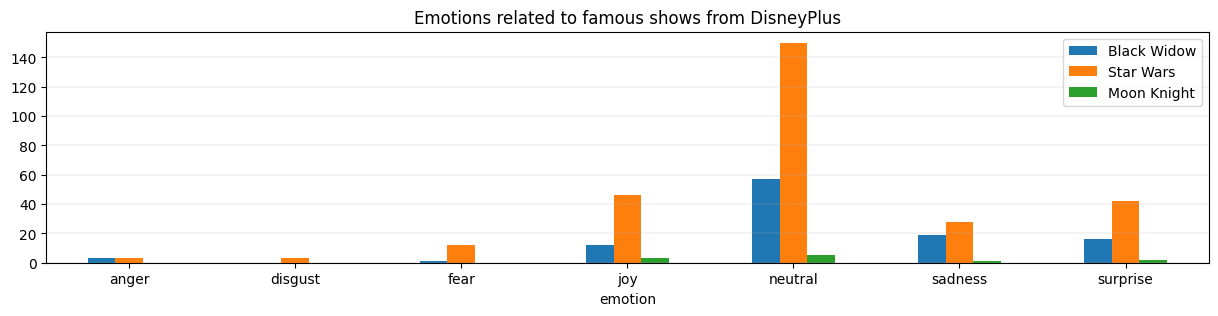

In [18]:
# Bar chart for emotions sentiments for Disney shows
df_emotion.plot(y=['Black Widow','Star Wars','Moon Knight'], kind='bar', rot=0,figsize=(15,3));
plt.grid(axis='y', linewidth = 0.2)
plt.title('Emotions related to famous shows from DisneyPlus');

### Summary

Most posts have a neutral sentiment towards all of the shows. It can be inferred that most of these posts are discussing about the show details and not expressing any strong emotional sentiments. Excluding neutral sentiment, surprise was the next common emotion with Stranger Things being the most discussed show amongst them.<br>

The order of most common emotion shown in the subreddits are as follow:
1. Neutral
2. Surprise
3. Joy
4. Sadness
5. Fear
6. Anger
7. Disgust

Looking at the perspective of respective shows and excluding neutral sentiment, Joy is the most common emotion for Squid Game, Star Wars and Moon Knight. Surprise is the most common emotion for Stranger Things. Sadness is the most common emotion for Better Call Saul and Black Widow.

---

## Conclusion

**Classification Model**

Logistic Regression is the most suitable model to use for classifying posts to 2 different streaming services (DisneyPlus and Netflix). This model is able to predict the correct streaming service label tags better than leaving the label tagging by chance. Leaving the tagging by chance has a probabilty of about 0.5 of it being correct.<br>

Reasons are stated as per below:
1. Accuracy score has consistently fall within the range of 0.78 to 0.795.
2. Accuracy score is well above 0.5, which is the rough probability of the label tagging being correct, if left to chance.
3. Recall score and Precision score do not differ too much (Difference of 0.01). This means that the model performs consistently in predicting Netflix posts.
4. Specificity score is very close to Recall score. This implies that the model performs consistently towards predicting DisneyPlus posts as well as Netflix posts.
5. AUC metric is relatively close to 1. This implies that the model fits well with the data corpus on hand.

**Sentiment Analysis**

Stranger Things is the most discussed show in the forum with most posts expressing surprise, followed by joy. Given that surprise and joy are generally the most common emotions across the shows, it shows most users prefer to publish joyful or surprising posts of their favourite shows. Posts filled with anger or disgust are unfavorable to users and are rarely published in Reddit.

**Limitation/Further Improvements**

Our model might not be able to predict well when there are more than 2 classes. For example, if we need to classify posts based on Netflix, DisneyPlus and Amazon Prime Video, we will need more data on posts related to Amazon Prime Videos to retrain the model. In addition, other classification models (i.e. k-Nearest Neighbors Classifier) might perform much better under multi-class classification scenarios.<br>
We restricted the maximum number of word vector features at 2500 when piping them into our model for training. The performance of the model might be different if we chose to increase or decrease the maximum number of features. We can run multiple experiments with varying maximum number of features on the baseline model to pinpoint the optimal maximum number of features.<br>
A limitation of Logistic Regression is that it assumes the features have at most moderate multicollinearity with each other in order to perform well. This might be hard to achieve with text words in real world scenario.<br>

Our sentiment analysis is quite rudimentary in nature as we analysed the title text. Ideally, we can run analysis in the body text to understand the intensity of emotion in each posts. Sentiment analysis on images and videos in the posts also can provide more signal to the model on the key emotion expressed.

## Recommendation

Going back to the problem statement, we recommend that the logistic regression model should be used for tagging posts to the right streaming service platform. This model would perform well when it needs to tag posts to either DisneyPlus or Netflix.

We recommend that the client should promote more joyful or surprising posts in their search and homepage recommendations to boost user activity on their website.